# Соберите все данные из папки data в один датафрэйм
имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)


### Вариант 1


In [149]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
path = r'C:\data'

In [72]:
path_parts = r'C:\data\2020-12-03\Alexey_Smirnov'.split('\\')

In [76]:
date = path_parts[-2]
name = path_parts[-1]

In [156]:
# Create df for all data
df = pd.DataFrame()

# read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        # Construct full path to file               лучше
        data_path = f'{current_path}\\{file}'  # os.path.join('...','...','...',)
        
        # Read data
        temp_df=pd.read_csv(data_path)
        
        # Extract date and name
        path_parts = current_path.split('\\')
        date = path_parts[-2]
        name = path_parts[-1]
        
        # Add date and name columns
        temp_df['date'] = date
        temp_df['name'] = name
        # Union df
        df = pd.concat((df,temp_df))
        

In [82]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [86]:
df.reset_index(drop=True, inplace=True)

## Вариант 2


In [176]:
from pathlib import Path

In [159]:
path = Path(r'C:\data')

In [160]:
path

WindowsPath('C:/data')

In [170]:
# Create df for all data
df = pd.DataFrame()

# read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        part_path= Path(current_path)
        data_path = part_path / file
        # Read data
        temp_df=pd.read_csv(data_path)
        
        # Extract date and name
        date = data_path.parts[-3]
        name = data_path.parts[-2]
        
        # Add date and name columns
        temp_df['date'] = date
        temp_df['name'] = name
        # Union df
        df = pd.concat((df,temp_df))
        

In [172]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [173]:
df.reset_index(drop=True, inplace=True)

## Вариант 3


In [ ]:
from pathlib import Path

In [177]:
path = Path(r'C:\data')

In [178]:
miniproject_path = Path(path)

In [195]:
generator = miniproject_path.glob('**\*.csv') # найти какой-то файл .glob('**/что-то.csv')

In [196]:
df = pd.DataFrame()

In [197]:
for csv_path in generator:
    temp_df = pd.read_csv(csv_path)
    df = pd.concat((df, temp_df))

In [198]:
temp_df

,Unnamed: 0,product_id,quantity
0,0,82,4
1,1,74,2
2,2,54,3


## сумма по колонке quantity

In [88]:
df.quantity.sum()

480

## Выясните, какой пользователь купил больше всего товаров.
Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [98]:
total_quantity = df.groupby('name', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .rename(columns={'quantity': 'total_quantity'}) \
    .sort_values('total_quantity',ascending=False)

In [99]:
total_quantity

,name,total_quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


## Найдите топ-10 товаров 
по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [101]:
df.head()

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov


In [115]:
df_best_10_product = df.groupby('product_id', as_index=False) \
                    .agg({'quantity': 'sum'}) \
                    .sort_values('quantity',ascending=False) \
                    .head(10)

In [116]:
df_best_10_product

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

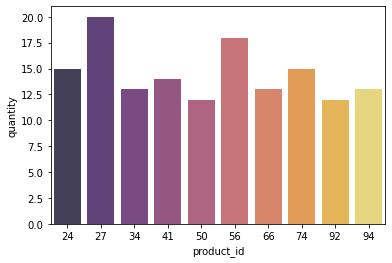

In [137]:
sns.barplot(data=df_best_10_product , x='product_id', y='quantity', palette = "inferno", alpha = 0.8 )

## Визуализируйте продажи по дням

In [142]:
salse_on_day = df.groupby('date', as_index=False) \
                    .agg({'quantity': 'sum'})

salse_on_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


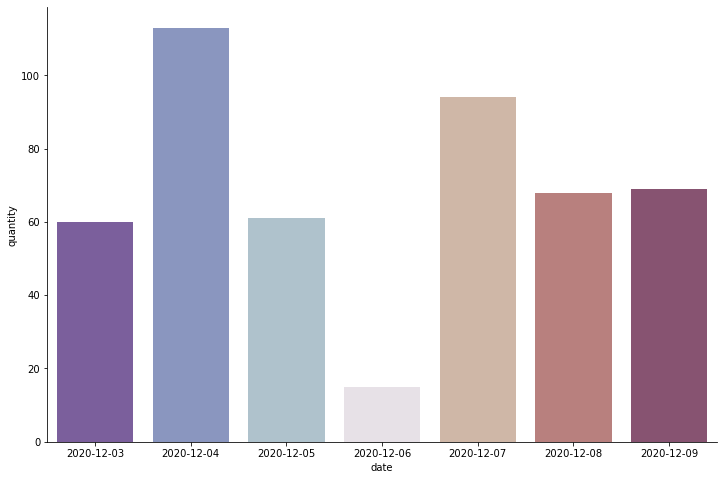

In [153]:
plt.figure(figsize=(12,8))
sns.barplot(data=salse_on_day , x='date', y='quantity', palette = "twilight_shifted", alpha = 0.8 )
sns.despine();

## Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?

In [155]:
df.groupby(['name','product_id']) \
    .agg({'date': pd.Series.nunique}) \
    .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
